# **Análise dos Dados de Partidas de Futebol**

Este projeto tem como foco a análise e modelagem de dados relacionados a partidas de futebol, utilizando técnicas de regressão e classificação para prever o número de gols e possíveis resultados das partidas. Foram aplicados diversos tratamentos aos dados, como remoção de duplicatas, exclusão de valores ausentes (NaN) e eliminação de outliers, garantindo uma base mais limpa e confiável para os modelos. Além disso, foram utilizadas bibliotecas amplamente para visualização, manipulação de dados e construção de modelos preditivos.

## Objetivo 

Os dados de partidas de futebol oferecem um grande potencial para compreender o desempenho dos times e os fatores que influenciam o resultado dos jogos. O objetivo deste projeto é realizar uma análise exploratória desses dados, aplicando tratamentos cuidadosos para valores ausentes e outliers de forma a preservar suas características originais. A partir disso, busca-se desenvolver modelos preditivos capazes de estimar o número de gols e os desfechos das partidas com maior precisão.

## Obtenção dos dados

In [998]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando modelos e métricas da biblioteca scikit-learn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

# Define o estilo dos gráficos como "ggplot" para melhor visualização
plt.style.use('ggplot')

# Configurações de exibição do pandas
pd.options.display.max_columns = 200  # Mostra até 200 colunas ao exibir um DataFrame
pd.options.display.max_rows = 100     # Mostra até 100 linhas ao exibir um DataFrame

In [999]:

# Lendo o arquivo 
df = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv')

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

- **Chutes a gol 1 / 2**: Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2.
- **Impedimentos 1 / 2**: Quantas vezes cada time foi pego em posição de impedimento.
- **Escanteios 1 / 2**: Total de cobranças de escanteio a favor de cada equipe.
- **Chutes fora 1 / 2**: Finalizações que não foram na direção do gol (para fora) de cada time.
- **Faltas 1 / 2**: Quantas faltas cada time cometeu durante a partida.
- **Cartões amarelos 1 / 2**: Quantos cartões amarelos foram mostrados a jogadores de cada time.
- **Cartões vermelhos 1 / 2**: Quantos cartões vermelhos foram mostrados a jogadores de cada time.
- **Cruzamentos 1 / 2**: Número de passes laterais elevados (cruzamentos) realizados por cada equipe.
- **Laterais 1 / 2**: Quantas vezes cada time executou arremessos laterais.
- **Chutes bloqueados 1 / 2**: Finalizações de cada time que foram bloqueadas por defensores adversários.
- **Contra-ataques 1 / 2**: Quantas ações de contra-ataque (recuperação e transição rápida) cada equipe conduziu.
- **Gols 1 / 2**: Número de gols marcados por cada time.
- **Tiro de meta 1 / 2**: Quantos arremessos de meta (goal kicks) cada time cobrou.
- **Tratamentos 1 / 2**: Quantas vezes jogadores de cada time receberam atendimento médico em campo.
- **Substituições 1 / 2**: Número de trocas de jogadores realizadas por cada equipe.
- **Tiros-livres 1 / 2**: Quantas cobranças de falta (tiros livres) cada time teve.
- **Defesas difíceis 1 / 2**: Número de defesas de alta dificuldade feitas pelos goleiros de cada time.
- **Posse 1 / 2 (%)**: Percentual de tempo de posse de bola de cada equipe ao longo da partida.
- **Time 1 / 2**: Nome do time da casa (1) e do time visitante (2).
- **Position 1 / 2**: Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).

Vamos dar uma olhada nas primeiras linhas do Dataframe.


In [1000]:
#Primeiras 5 linhas 
df.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiro de meta 1,Tiro de meta 2,Tratamentos 1,Tratamentos 2,Substituições 1,Substituições 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


A seguir, o df.describe() oferece um resumo estatístico das variáveis numéricas, incluindo média, desvio padrão, quartis e valores extremos. Essa análise permite identificar a distribuição dos dados e detectar possíveis outliers. É uma etapa crucial para entender o comportamento das variáveis antes de aplicar transformações.

In [1001]:
df.describe()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiro de meta 1,Tiro de meta 2,Tratamentos 1,Tratamentos 2,Substituições 1,Substituições 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%)
count,26204.000000,26204.000000,24942.000000,24942.000000,25388.000000,25388.000000,25392.000000,25392.000000,25394.000000,25394.000000,27716.000000,27716.000000,27716.000000,27716.000000,9015.000000,9015.000000,15167.000000,15167.000000,8843.000000,8843.000000,6263.000000,6263.000000,27716.000000,27716.000000,12015.000000,12015.000000,5019.000000,5019.000000,9420.000000,9420.000000,6246.000000,6246.000000,6196.000000,6196.000000,25366.000000,25366.000000
mean,4.767287,3.854526,2.139844,1.968527,5.548409,4.459824,6.034302,4.956758,12.694495,12.946444,1.861849,2.121807,0.049610,0.058594,17.680865,14.237382,15.736204,15.067383,2.438313,1.930001,1.322689,1.156634,1.526194,1.173402,7.061257,8.371369,1.995617,2.134489,3.000318,3.001168,14.156260,14.245757,2.676888,3.206908,51.315659,48.508279
std,2.797705,2.444182,1.754924,1.681298,2.975521,2.620973,3.224260,5.451316,4.337402,4.608542,1.354635,1.412411,0.225298,0.247436,8.019120,7.082809,8.256598,8.085228,1.893784,1.644897,1.490460,1.404204,1.293093,1.140984,3.188059,3.528228,2.258323,2.296141,1.020285,1.033004,4.432963,4.335781,1.842689,2.078474,9.834217,9.808893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,12.000000,9.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.000000,6.000000,0.000000,0.000000,3.000000,3.000000,11.000000,11.000000,1.000000,2.000000,45.000000,42.000000
50%,4.000000,4.000000,2.000000,2.000000,5.000000,4.000000,6.000000,5.000000,12.000000,13.000000,2.000000,2.000000,0.000000,0.000000,17.000000,13.000000,16.000000,15.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,1.000000,2.000000,3.000000,3.000000,14.000000,14.000000,2.000000,3.000000,52.000000,48.000000
75%,6.000000,5.000000,3.000000,3.000000,7.000000,6.000000,8.000000,7.000000,15.000000,16.000000,3.000000,3.000000,0.000000,0.000000,22.000000,18.000000,22.000000,21.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,9.000000,11.000000,3.000000,3.000000,3.000000,3.000000,17.000000,17.000000,4.000000,4.000000,58.000000,55.000000
max,90.000000,80.000000,23.000000,15.000000,22.000000,21.000000,23.000000,748.000000,46.000000,180.000000,11.000000,10.000000,3.000000,4.000000,66.000000,63.000000,48.000000,46.000000,15.000000,12.000000,16.000000,15.000000,10.000000,9.000000,23.000000,27.000000,17.000000,16.000000,6.000000,6.000000,36.000000,33.000000,11.000000,17.000000,100.000000,100.000000


A análise do df.describe() revela que a maioria das variáveis apresenta uma ampla variação, com algumas colunas mostrando valores máximos bastante elevados, como "Chutes fora 2" (748) e "Faltas 2" (180). A distribuição dos dados tende a ser assimétrica, com a presença de valores extremos, evidenciada pelas diferenças entre o valor médio e o valor máximo, especialmente nas variáveis com valores de 75% próximos aos valores máximos. Algumas variáveis, como "Gols 1" e "Gols 2", têm médias mais baixas em comparação aos seus máximos, sugerindo que há jogos com poucos gols, mas também jogos com um número significativo de gols. As colunas relacionadas a cartões e faltas apresentam uma concentração de dados mais baixa, com a maior parte dos valores ao redor de 0, refletindo a natureza esparsa desses eventos nas partidas.

### Quantas linhas e colunas o conjunto de dados possui? Quais os tipos das variáveis? 

In [1002]:
# Tamanho do DataFrame
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}\n')

# Tipos de dados de cada coluna
print("Tipos de dados por coluna:\n")
print(df.dtypes)

Número de linhas: 27716
Número de colunas: 40

Tipos de dados por coluna:

Chutes a gol 1         float64
Chutes a gol 2         float64
Impedimentos 1         float64
Impedimentos 2         float64
Escanteios 1           float64
Escanteios 2           float64
Chutes fora 1          float64
Chutes fora 2          float64
Faltas 1               float64
Faltas 2               float64
Cartões amarelos 1     float64
Cartões amarelos 2     float64
Cartões vermelhos 1    float64
Cartões vermelhos 2    float64
Cruzamentos 1          float64
Cruzamentos 2          float64
Laterais 1             float64
Laterais 2             float64
Chutes bloqueados 1    float64
Chutes bloqueados 2    float64
Contra-ataques 1       float64
Contra-ataques 2       float64
Gols 1                 float64
Gols 2                 float64
Tiro de meta 1         float64
Tiro de meta 2         float64
Tratamentos 1          float64
Tratamentos 2          float64
Substituições 1        float64
Substituições 2        flo

O conjunto de dados analisado possui 27.716 linhas e 40 colunas, representando um volume significativo de informações sobre partidas de futebol. A maioria das colunas é composta por variáveis numéricas do tipo float64, o que permite a aplicação de técnicas estatísticas e algoritmos de machine learning com maior facilidade. Essas variáveis envolvem aspectos técnicos dos jogos, como chutes, faltas, cartões e posse de bola, separados para cada time.

Além disso, há colunas do tipo object, que representam dados categóricos, como os nomes dos times e posições em campo. Essa combinação de dados quantitativos e qualitativos torna o dataset rico e propício tanto para análises descritivas quanto para a construção de modelos preditivos.

## Limpeza e transformação dos dados

Precisamos garantir que os dados que estamos analisando sejam precisos, caso contrário, os resultados de nossa análise estarão errados.

Fizemos uma cópia do DataFrame original para preservar os dados intactos durante a análise exploratória e o desenvolvimento do modelo preditivo. Isso nos permite realizar transformações e comparações com os dados originais, garantindo que qualquer alteração possa ser revertida, além de avaliar o impacto das mudanças nas performances do modelo.

Ao longo desta análise, foram feitas cópias específicas do DataFrame para diferentes abordagens, pois testamos quatro modelos preditivos distintos e identificamos que cada modelo responde melhor a diferentes estratégias de tratamento dos dados. Por exemplo, alguns modelos apresentaram melhor desempenho com a remoção de outliers, enquanto outros foram mais eficazes com imputação de valores ausentes. Essa flexibilidade permite otimizar os resultados conforme as características de cada algoritmo.

In [1003]:
df_copy = df.copy()

### Análise de simetria

A simetria da distribuição será inicialmente avaliada com o objetivo de entender o comportamento geral dos dados antes de qualquer etapa de limpeza ou transformação. No entanto, como se trata de um conjunto de dados relacionado a partidas de futebol — um fenômeno fortemente influenciado por fatores aleatórios — é esperado que a maior parte das colunas apresente distribuições assimétricas. Estatísticas como número de gols, faltas ou cartões, por exemplo, tendem a se concentrar em valores baixos, com poucos casos extremos, o que resulta naturalmente em uma cauda alongada e assimetria na distribuição.

Ainda assim, a análise da simetria é útil por fornecer uma visão inicial sobre o grau dessas distorções e orientar decisões de pré-processamento, como a escolha da técnica mais apropriada para imputação de valores ausentes. Em distribuições muito assimétricas, por exemplo, o uso da mediana como substituição tende a ser mais eficaz do que a média, pois é menos sensível a outliers. 

A avaliação será feita por meio da métrica skewness (ou coeficiente de assimetria), que mede o grau de inclinação da curva de distribuição: valores próximos de zero indicam simetria, enquanto valores positivos ou negativos indicam caudas longas à direita ou à esquerda, respectivamente.

Mesmo em um contexto aleatório como o futebol, entender essas características ajuda a manter a coerência estatística nas etapas seguintes da análise.

In [1004]:
# Selecionando apenas colunas numéricas
colunas_numericas = df_copy.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando a tabela
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Função para colorir a coluna de distribuição
def destacar_distribuicao(val):
    if val == 'Simétrica':
        return 'background-color: #DFF0D8; color: black'  # verde claro
    else:
        return 'background-color: #F2DEDE; color: black'  # vermelho claro

# Aplicando estilo: coluna 1 fica branca, coluna 2 colorida
tabela_colorida = tabela_simetria.style \
    .format({'Assimetria (skewness)': '{:.3f}'}) \
    .set_properties(subset=['Assimetria (skewness)'], **{'background-color': 'white', 'color': 'black'}) \
    .applymap(destacar_distribuicao, subset=['Distribuição'])

tabela_colorida



/tmp/ipykernel_275296/3315269554.py:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  tabela_colorida = tabela_simetria.style \


,Assimetria (skewness),Distribuição
Chutes fora 2,99.858,Assimétrica
Cartões vermelhos 1,4.633,Assimétrica
Cartões vermelhos 2,4.431,Assimétrica
Faltas 2,2.821,Assimétrica
Contra-ataques 2,2.147,Assimétrica
Contra-ataques 1,2.024,Assimétrica
Chutes a gol 2,1.968,Assimétrica
Chutes a gol 1,1.812,Assimétrica
Tratamentos 1,1.502,Assimétrica
Tratamentos 2,1.372,Assimétrica


A análise da assimetria (skewness) revelou que a maior parte das variáveis numéricas apresenta distribuições assimétricas, o que é esperado dada a aleatoriedade das variáveis. Isso ocorre porque não existe uma métrica fixa para a distribuição de uma variável em todas as partidas devido ao enorme número de fatores que influenciam o jogo. Por exemplo, o número de contra-ataques de um time pode variar dependendo de:

O time adversário: Se o time adversário adota uma estratégia mais defensiva ou ofensiva, isso influencia diretamente o número de contra-ataques.

O placar da partida: Quando um time está perdendo, ele tende a se expor mais, o que pode gerar mais contra-ataques.

Erros e falhas durante o jogo: O futebol é sujeito a erros, como falhas defensivas ou passes errados, que criam oportunidades para contra-ataques.

Condições climáticas: Fatores como chuva ou vento podem afetar o desempenho e aumentar a probabilidade de erros que resultam em contra-ataques.

Esses fatores, entre outros, explicam por que times considerados mais "fracos" podem vencer times "fortes". Esse comportamento contribui para uma distribuição assimétrica dos dados, o que pode comprometer a consistência de modelos que assumem distribuições mais equilibradas. Por isso, nas próximas etapas, o tratamento de valores duplicados e outliers será realizado com o objetivo de reduzir a assimetria, mas sem tornar os dados completamente simétricos, pois a aleatoriedade é uma característica fundamental dos dados de futebol.

### Tratando linhas duplicadas

Verificando se há registros duplicados no Dataframe, pois não nos interessa analisar a mesma partida mais de uma vez. 

In [1005]:

# Verificando se há linhas duplicadas no dataframe
if df_copy.duplicated().any():
    # Contando o número total de linhas duplicadas
    quantidade_duplicadas = df_copy.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')


Sim, existem 12 linhas duplicadas.


Identificamos a presença de registros duplicados no dataframe. Na ausência de uma coluna com a data das partidas, adotamos o critério de considerar duplicatas exatas como representações da mesma partida. 

Assim, como cada linha representa uma partida de futebol, essas duplicatas indicam possíveis inconsistências, como erros de entrada ou falhas na coleta de dados.

A remoção dessas entradas garante que cada partida seja considerada apenas uma vez, preservando a integridade do conjunto de dados e evitando distorções nas análises estatísticas.

In [1006]:
# Retorna um novo DataFrame com apenas as linhas não duplicadas
df_sem_duplicadas = df_copy.drop_duplicates().reset_index(drop=True)

# Nos modelos Random Forest e Regressão Logística não é necessário fazer tratamento de NaN e outliers.
# Por isso ficarão só com o tratamento das linhas duplicadas. Os DataFrames abaixo serão retomados somente
# na seção de cada modelo preditivo.
df_randomForest = df_sem_duplicadas.copy()
df_logisticRegression = df_sem_duplicadas.copy()

# Verificando novamente se há linhas duplicadas no DataFrame
if df_sem_duplicadas.duplicated().any():
    quantidade_duplicadas = df_sem_duplicadas.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')


Não, não existem linhas duplicadas.


### Qual a porcentagem de valores ausentes no dataset?

Vamos analisar a porcentagem de Not a Number em cada coluna.

In [1007]:
# Porcentagem de NaN
def pegaPorcentagemNulaTabelas(tabela):
  porcentagens = (tabela.isnull().sum() / len(tabela) * 100)
  return porcentagens.sort_values(ascending=False).to_frame(name='% de valores ausentes')

tabelaPorcentagem = pegaPorcentagemNulaTabelas(df_sem_duplicadas)

# Exibe a tabela com estilo (funciona melhor em Jupyter ou Colab)
tabelaPorcentagem.style \
    .background_gradient(cmap='Reds') \
    .format("{:.2f}") \
    .set_caption("Porcentagem de valores ausentes por coluna")


,% de valores ausentes
Tratamentos 2,81.88
Tratamentos 1,81.88
Defesas difíceis 2,77.67
Defesas difíceis 1,77.67
Tiros-livres 1,77.49
Tiros-livres 2,77.49
Contra-ataques 2,77.39
Contra-ataques 1,77.39
Chutes bloqueados 1,68.08
Chutes bloqueados 2,68.08


Considerando que os valores das correlações de Pearson e Spearman são muito baixo atrelado ao alto números de NaN as colunas eliminadas serão: Tratamentos 1, Tratamentos 2, Substituições 1, Substituições 2, Laterais 1, Laterais 2, Tiro de meta 1 e Tiro de meta 2.

As variáveis Tratamentos 1 e Tratamentos 2 serão removidas do conjunto de dados devido à elevada proporção de valores ausentes, superior a 81%. Como esses eventos não são recorrentes em todas as partidas e, muitas vezes, não têm relação direta com o desempenho técnico ou tático das equipes, sua presença esparsa reduz sua utilidade como variável. Além disso, a aleatoriedade desses acontecimentos — que podem depender de fatores externos como choques acidentais ou condições do gramado — dificulta sua utilização como indicador consistente de tendência ou influência no resultado da partida.

As variáveis Substituições 1 e Substituições 2 serão removidas do conjunto de dados por apresentarem aproximadamente 66% de valores ausentes e pelo modo como influencia o resultado de um jogo. Embora as substituições possam influenciar momentaneamente o desempenho de uma equipe, sua frequência e impacto variam bastante entre os jogos, dificultando uma análise consistente. Além disso, a alta taxa de dados faltantes indica que essa informação não foi registrada com regularidade, o que compromete sua utilidade como variável preditiva. Como seu efeito no resultado final da partida tende a ser indireto e situacional — muitas vezes relacionado a estratégias específicas, lesões ou decisões de gestão de elenco — optou-se por sua exclusão.

As variáveis "Tiro de meta 1" e "Tiro de meta 2" serão removidas devido à elevada proporção de valores ausentes. Esses eventos são muito específicos e esparsos, dependendo de situações pontuais, como reposição de bola ou interrupções no jogo, o que reduz sua utilidade como variável preditiva. Além disso, a alta taxa de dados faltantes compromete sua consistência.

As variáveis "Chutes bloqueados 1" e "Chutes bloqueados 2" também serão eliminadas, pois não oferecem insights significativos sobre o desempenho das equipes.Embora possam ser um indicativo de uma defesa forte ou de uma pressão ofensiva, esses eventos dependem de fatores específicos, como a posição do jogador e a qualidade defensiva do adversário. Como têm impacto limitado no resultado final e não fornecem informações consistentes ao longo das partidas, sua exclusão ajuda a refinar o modelo preditivo.

As variáveis "Cruzamentos 1" e "Cruzamentos 2" serão excluídas do conjunto de dados, pois sua frequência e impacto no desempenho das equipes são baixos. A frequência de cruzamentos pode variar muito entre os jogos, dependendo da estratégia adotada pelas equipes e das circunstâncias específicas da partida. Além disso, a eficácia de um cruzamento (como a conversão em gols) é mais relevante do que a quantidade, o que faz com que a variável não agregue valor suficiente para ser mantida no conjunto de dados.

As variáveis acima foram testadas em relação à análise de correlação de Pearson e nos modelos preditivos, mas apresentaram baixa relação com as variáveis-chave do desempenho das equipes, "Gols 1" e "Gols 2". Como essas variáveis não agregam valor significativo à previsão dos resultados, sua eliminação contribui para a melhoria da acurácia dos modelos preditivos, removendo dados que não influenciam diretamente o desempenho e os resultados das partidas.

In [1008]:
# Lista das colunas a serem eliminadas
colunas_para_deletar = [
    'Tratamentos 1', 'Tratamentos 2',
    'Substituições 1', 'Substituições 2',
    'Tiro de meta 1', 'Tiro de meta 2',
    'Chutes bloqueados 1', 'Chutes bloqueados 2',
    'Cruzamentos 1', 'Cruzamentos 2'
]

df_colunas_deletadas = df_sem_duplicadas.copy()

# Filtrando para manter apenas as colunas que existem no DataFrame
colunas_existentes = [col for col in colunas_para_deletar if col in df_colunas_deletadas.columns]

# Deletando as colunas que existem e criando um novo df para salvar essa mudança
df_colunas_deletadas.drop(columns=colunas_existentes, inplace=True)

print(f'Número de colunas: {df_colunas_deletadas.shape[1]}\n')


Número de colunas: 30



Em seguida, optou-se pela imputação pela mediana nas colunas numéricas, considerando que a maioria dessas variáveis não apresenta distribuição normal. Já para as colunas categóricas (Position 1, Position 2, Time 1 e Time 2) com valores ausentes, a imputação foi realizada por meio da moda, ou seja, o valor mais frequente da variável. Essa abordagem é adequada, pois essas colunas não são numéricas, o que inviabiliza o uso de medidas como a média ou a mediana.

In [1009]:
# Imputa os NaNs pela mediana de cada coluna
def preencheTabelaComMediana():
    colunas_excecao = ['Time 1', 'Time 2', 'Position 1', 'Position 2']
    colunas_para_imputar = [
        col for col in df_colunas_deletadas.columns
        if col not in colunas_excecao and pd.api.types.is_numeric_dtype(df_colunas_deletadas[col])
    ]
    
    for col in colunas_para_imputar:
        mediana = df_colunas_deletadas[col].median()
        df_colunas_deletadas[col] = df_colunas_deletadas[col].fillna(mediana)
    
    return df_colunas_deletadas

df_colunas_deletadas = preencheTabelaComMediana()


 A moda, por sua vez, é a medida de tendência central mais apropriada para dados categóricos, permitindo preencher os valores ausentes com a categoria mais representativa e, assim, preservar a estrutura original da variável.

In [1010]:

# Preenchemos apenas a posição com moda pelo fato de sua coluna ser tipada como um string
def preencheTabelaComModa():
    modaP1, modaP2 = df_colunas_deletadas['Position 1'].mode()[0],df_colunas_deletadas['Position 2'].mode()[0]
    df_colunas_deletadas['Position 1']=df_colunas_deletadas['Position 1'].fillna(modaP1)
    df_colunas_deletadas['Position 2']=df_colunas_deletadas['Position 2'].fillna(modaP2)
    return df_colunas_deletadas
df_imputado = preencheTabelaComModa()

### Tratando Outliers

O tratamento de outliers é fundamental em distribuições assimétricas como as observadas neste conjunto de dados, pois valores extremos podem distorcer estatísticas descritivas, impactar a performance de modelos preditivos e esconder padrões. No contexto de dados esportivos, como partidas de futebol, essas anomalias podem surgir por erros de coleta, registros duplicados ou situações atípicas que não representam o comportamento geral. Ao tratar os outliers, buscamos reduzir a assimetria e tornar as análises mais representativas da realidade. Essa etapa é especialmente importante antes da aplicação de técnicas de aprendizado de máquina, que muitas vezes assumem distribuições mais próximas da normalidade.

O método escolhido para tratar os outliers foi uma adaptação do IQR (Intervalo Interquartil), uma técnica eficaz para identificar valores atípicos em distribuições que não seguem uma forma normal. Tradicionalmente, o IQR é calculado como a diferença entre o terceiro quartil (Q3, 75%) e o primeiro quartil (Q1, 25%), sendo considerados outliers os valores que estão fora do intervalo entre Q1 - 1,5 * IQR e Q3 + 1,5 * IQR.

No entanto, como os dados analisados são de partidas de futebol — naturalmente sujeitos a assimetrias, variações extremas e aleatoriedade —, adotou-se uma abordagem mais flexível, ampliando os limites do IQR para os percentis 2% e 98%. Essa escolha permite manter no conjunto de dados os eventos atípicos moderados, que fazem parte do contexto esportivo, e remover apenas os valores extremamente discrepantes, que poderiam afetar negativamente o desempenho dos modelos.

Essa versão mais permissiva do IQR mantém a robustez do método, ao mesmo tempo que evita perdas excessivas de dados informativos. Além disso, contribuiu diretamente para o aumento da acurácia dos modelos preditivos utilizados, demonstrando que o ajuste foi eficaz tanto estatisticamente quanto em termos de performance preditiva.

In [1011]:
# Definindo o threshold para o IQR
threshold = 1.5

# Selecionando apenas colunas numéricas
numeric_cols = df_imputado.select_dtypes(include='number').columns

# Criando um dicionário para armazenar os resultados
outliers_por_coluna = {}

for col in numeric_cols:
    Q1 = df_imputado[col].quantile(0.04)
    Q3 = df_imputado[col].quantile(0.96)
    IQR = Q3 - Q1
    outliers = df_imputado[(df_imputado[col] < Q1 - threshold * IQR) | (df_imputado[col] > Q3 + threshold * IQR)]
    outliers_por_coluna[col] = len(outliers)

# Criando uma tabela
tabela_outliers = pd.DataFrame.from_dict(outliers_por_coluna, orient='index', columns=['Quantidade de Outliers'])
tabela_outliers = tabela_outliers.sort_values(by='Quantidade de Outliers', ascending=False)

print(tabela_outliers)


                     Quantidade de Outliers
Contra-ataques 1                        130
Contra-ataques 2                        100
Defesas difíceis 1                       43
Defesas difíceis 2                        9
Gols 2                                    8
Tiros-livres 1                            8
Tiros-livres 2                            7
Impedimentos 2                            5
Chutes a gol 2                            4
Faltas 2                                  3
Cartões vermelhos 2                       3
Cartões amarelos 1                        1
Chutes a gol 1                            1
Cartões vermelhos 1                       1
Impedimentos 1                            1
Chutes fora 2                             1
Faltas 1                                  1
Escanteios 1                              0
Chutes fora 1                             0
Escanteios 2                              0
Cartões amarelos 2                        0
Laterais 2                      

In [1012]:
# Remover os outliers das colunas numéricas
for col in numeric_cols:
    Q1 = df_imputado[col].quantile(0.02)
    Q3 = df_imputado[col].quantile(0.98)
    IQR = Q3 - Q1
    
    # Identificando os outliers
    outliers = df_imputado[(df_imputado[col] < Q1 - threshold * IQR) | (df_imputado[col] > Q3 + threshold * IQR)]
    
    # Excluindo os outliers
    df_sem_out = df_imputado.drop(outliers.index)


### Mudando o tipo de variável das colunas

As colunas "Position 1", "Position 2", "Time 1" e "Time 2" foram codificadas numericamente com o objetivo de permitir que essas variáveis categóricas sejam utilizadas em modelos de aprendizado de máquina. Como algoritmos preditivos não conseguem processar diretamente dados do tipo string, foi necessário transformar essas categorias em números únicos por meio de dicionários de codificação. Com isso, cada formação tática e cada equipe recebeu um identificador numérico, mantendo a distinção entre os diferentes valores sem impor uma relação ordinal entre eles. Essa transformação é essencial para que os modelos como Regressão Linear e Redes Neurais consigam interpretar essas informações e identificar possíveis padrões relacionados ao desempenho dos times e suas formações ao longo das partidas.

In [1013]:
# Colunas não numéricas: Time e Position

times = np.union1d(df_sem_out['Time 1'].dropna().unique(), df_sem_out['Time 2'].dropna().unique())
times_codigo = {times[i]: (i+1) for i in range(len(times))}
print("Total de Times = {}".format(len(times)))

posicoes = np.union1d(df_sem_out['Position 1'].dropna().unique(), df_sem_out['Position 2'].dropna().unique())
posicoes_codigo = {posicoes[i]: (i+1) for i in range(len(posicoes))}
print("Total de Formações = {}".format(len(posicoes)))

def insere_coluna_codificada(coluna, nome_coluna_codigo, dicionario_codificacao):
    if(nome_coluna_codigo not in df_sem_out.columns):
        df_sem_out.insert(df_sem_out.columns.get_loc( coluna )+1, nome_coluna_codigo, df_sem_out[ coluna ].map( dicionario_codificacao ))

# Cria o dataframe com as colunas não numéricas codificadas em novas

insere_coluna_codificada('Position 1', 'Pos1_codigo', posicoes_codigo)
insere_coluna_codificada('Position 2', 'Pos2_codigo', posicoes_codigo)
insere_coluna_codificada('Time 1', 'Time1_codigo', times_codigo)
insere_coluna_codificada('Time 2', 'Time2_codigo', times_codigo)

df_codificado = df_sem_out.copy()

# Nos modelos Regressão Linear e Redes Neurais serão utilizados o DataFrame com tratamentos de linhas duplicadas.
# outlier e NaN. Para cada modelo está sendo criada uma cópia separada do DataFrame tratável
# a fim de permitir ajustes específicos em cada abordagem.
df_linearRegression = df_codificado.copy()
df_neuralNetwork = df_codificado.copy()

df_codificado.head()


Total de Times = 310
Total de Formações = 30


,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Laterais 1,Laterais 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time1_codigo,Time 2,Time2_codigo,Position 1,Pos1_codigo,Position 2,Pos2_codigo
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,16.0,15.0,1.0,1.0,3.0,0.0,14.0,14.0,2.0,3.0,77.0,23.0,Glasgow Rangers,119,Livingston,171,4-3-3,23,4-3-3,23
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,16.0,15.0,1.0,1.0,0.0,0.0,14.0,14.0,2.0,3.0,44.0,56.0,Ross County,236,St.Johnstone,260,3-5-2,12,3-5-2,12
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,16.0,15.0,1.0,1.0,2.0,2.0,14.0,14.0,2.0,3.0,47.0,53.0,Dundee FC,86,St. Mirren,259,4-3-3,23,3-4-1-2,8
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,16.0,15.0,1.0,1.0,2.0,1.0,14.0,14.0,2.0,3.0,27.0,73.0,Hearts,129,Celtic,69,3-4-3,10,4-2-3-1,20
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,16.0,15.0,1.0,1.0,2.0,0.0,14.0,14.0,2.0,3.0,58.0,42.0,Aberdeen,4,Dundee U.,87,4-4-2,25,3-5-1-1,11


 ### Análise de Correlação com Gols e Frequência

 Assim sendo, para entendermos melhor a correlação entre Chutes a Gols e Gols, montamos um pairplot para verificarmos como a quantidade de gols varia em função do número de gols e vice-versa, o que nos resultou no resultado a seguir:


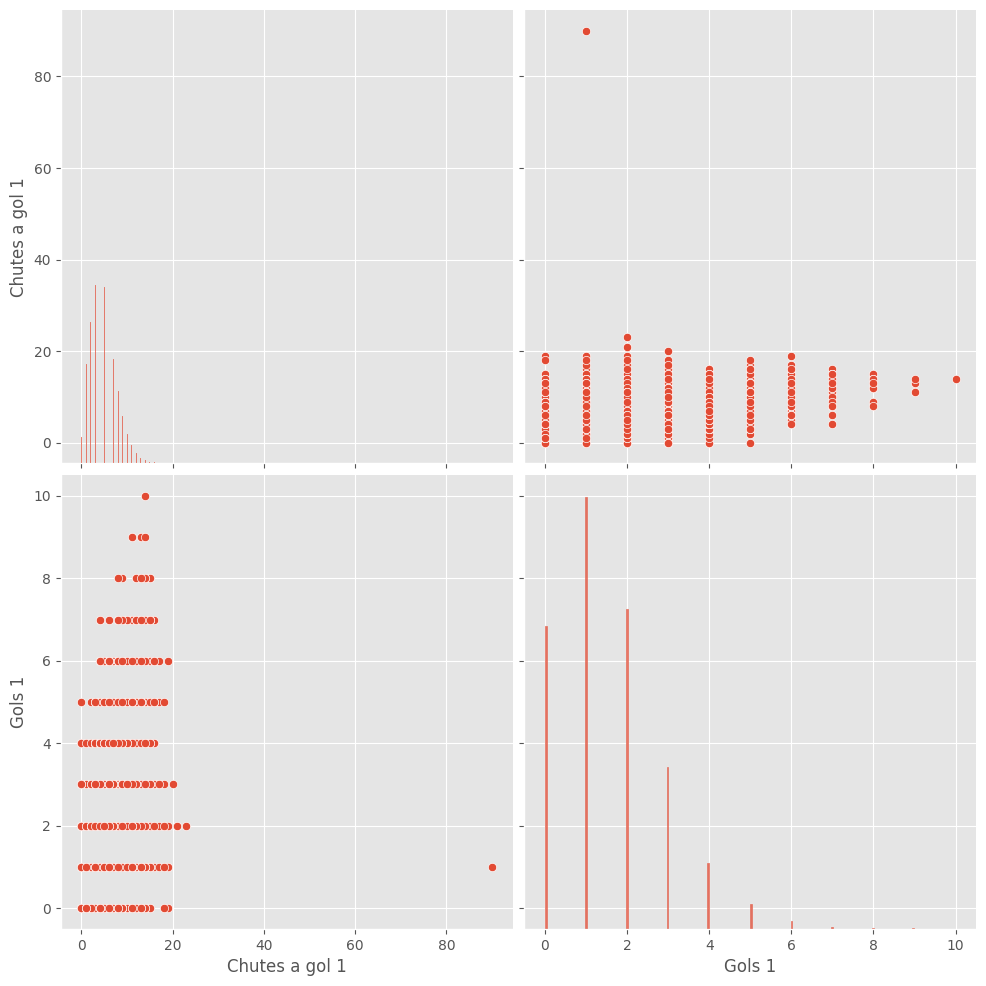

In [1014]:

sns.pairplot(df_codificado, vars=['Chutes a gol 1', 'Gols 1'], height=5)
plt.show()

Conforme podemos ver, não está muito claro, nos gráficos, se tais dados possuem uma alta correlação. Os dataTypes das colunas Chute a Gols 1 e Gols 1 são floats, porém, o conjunto que representa a possibilidade de valores dessas colunas pode facilmente ser identificado como um conjunto discreto, já que é impossível termos 3.5956754 gols em um partida, ou 5.67532 chute a gol em outra. Sendo assim, a quantidade de vezes que um par de dados (Chutes a Gol 1, Gols 1) aparece, no nosso dataset, é muito importante para que ocorra a plotação de um possível gráfico, pois podem haver vários casos em que acontecem, por exemplo, 10 chutes a gol e 5 gols em certas partidas. Consequentemente, um gráfico em 2d (Chutes a gol 1, Gols 1) não é suficiente para tirarmos conclusões na nossa análise, temos utilizar que outro eixo (frequência).

O código abaixo reúne, em um novo dataFrame, tais informações que necessitamos atualmente.

In [1015]:
result = df_codificado.groupby(['Chutes a gol 1', 'Gols 1']).size().reset_index(name='Frequência').sort_values('Frequência', ascending=False)
print(result)

     Chutes a gol 1  Gols 1  Frequência
24              4.0     1.0        1978
18              3.0     1.0        1491
25              4.0     2.0        1374
23              4.0     0.0        1358
32              5.0     1.0        1270
..              ...     ...         ...
144            19.0     0.0           1
147            19.0     6.0           1
148            20.0     3.0           1
150            23.0     2.0           1
151            90.0     1.0           1

[152 rows x 3 columns]


Dessa forma, montamos um gráfico para visualizarmos tais informações de forma mais intuitiva

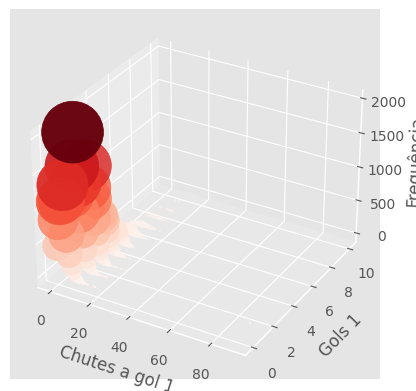

In [1016]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = result['Chutes a gol 1']
y = result['Gols 1']
z = result['Frequência']

ax.set_xlabel('Chutes a gol 1')
ax.set_ylabel('Gols 1')
ax.set_zlabel('Frequência')

ax.scatter(x,y, z, s=z, c=z, cmap='Reds')

plt.show()

Nesse gráfico, é importante perceber que, quanto maior a frequência, mais escura é a esfera.

A partir dele, podemos entender que, analisando as esferas mais escuras (casos que ocorrem mais no nosso dataset), um aumento no número de chutes a gol está muito correlacionado com uma maior quantidade de gols.

Podemos perceber, também, que os casos com o maior número de gols (são poucos casos, representados por esferas mais claras) estão muito relacionados com uma alta quantidade de chutes a gol de uma partida. 


#### Análise de Correlação de Pearson

Neste trabalho, decidimos realizar uma análise de correlação de Pearson para examinar as relações entre as variáveis do nosso DataFrame. A correlação de Pearson é uma ferramenta estatística amplamente utilizada para medir a força e a direção de uma possível relação linear entre duas variáveis contínuas, fornecendo um valor entre -1 e 1, onde:

1 indica uma correlação positiva perfeita,

-1 indica uma correlação negativa perfeita,

0 indica nenhuma correlação linear.

Embora o conjunto de dados seja aleatório e, portanto, não se espere uma relação linear direta entre as variáveis, a análise de correlação ainda é útil como uma ferramenta exploratória. Ela permite identificar potenciais padrões ou associações que podem não ser imediatamente óbvios, mesmo que a relação entre as variáveis não seja estritamente linear.

<Axes: >

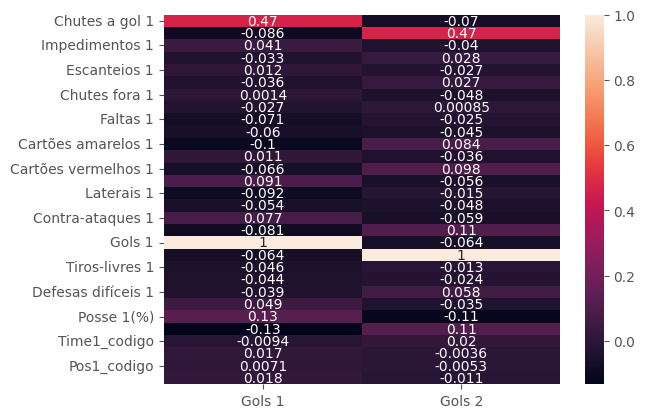

In [1017]:
correlacoes = df_codificado.drop(['Time 1', 'Time 2', 'Position 1', 'Position 2'], axis=1).corr()
#sns.heatmap(correlacoes)

correlacoes_com_Gols = pd.DataFrame({
    "Gols 1": correlacoes['Gols 1'], 
    "Gols 2": correlacoes['Gols 2'], 
})

sns.heatmap(correlacoes_com_Gols, annot=True, annot_kws={"size":10})

Com base nas correlações observadas entre as variáveis e os gols (Gols 1 e Gols 2), podemos concluir que a variável "Chutes a gol" é uma das mais fortemente correlacionadas com o número de gols marcados por cada time, tanto para a equipe 1 (com correlação de 0.468) quanto para a equipe 2 (com correlação de 0.472). Isso sugere que, quanto mais chutes a gol uma equipe realiza, maior a probabilidade de marcar gols, o que é um padrão esperado no contexto esportivo. Além disso, variáveis como "Posse de bola" e "Contra-ataques" apresentam correlações mais baixas, mas ainda assim indicam alguma relação com a probabilidade de marcar gols, especialmente para a equipe 1. Por outro lado, variáveis como "Cartões vermelhos", "Faltas" e "Impedimentos" apresentam correlações negativas mais fracas, sugerindo que, embora possam impactar o jogo, não têm uma relação direta e forte com o número de gols. Essas correlações fornecem insights iniciais sobre os fatores que podem influenciar os gols em uma partida, mas é importante lembrar que essas associações podem não ser lineares ou causais, dado que o conjunto de dados é aleatório.

## Modelos Preditivos

Com base nos resultados apresentados no trabalho de Buss (2023), que avaliou diferentes algoritmos de aprendizado de máquina aplicados à previsão de resultados de partidas de futebol, observou-se que os modelos de Regressão Logística, Random Forest e Redes Neurais apresentaram desempenho consistente, com acurácias superiores a 62%, além de boas métricas de ROC e f1-score. Esses resultados indicam que tais modelos são apropriados para cenários com dados complexos e de natureza esportiva, como o utilizado neste estudo. Por isso, essas três abordagens foram selecionadas para compor a fase de modelagem. A Regressão Linear também foi incluída como modelo complementar, especialmente para variáveis contínuas, enriquecendo a análise exploratória e ampliando o escopo da avaliação preditiva. Essa escolha é fundamentada nas evidências empíricas do artigo de Buss (2023), disponível em: https://lume.ufrgs.br/handle/10183/261788.

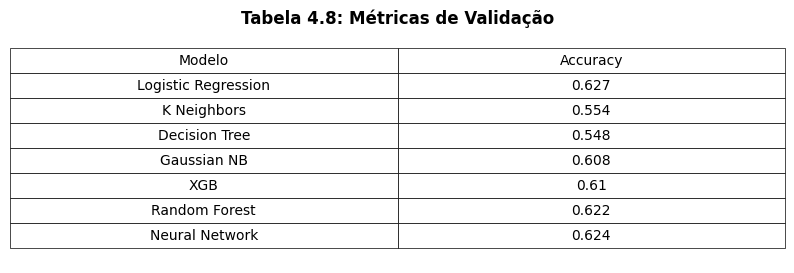

In [1018]:
# Dados da tabela
dados = {
    'Modelo': [
        'Logistic Regression', 'K Neighbors', 'Decision Tree', 'Gaussian NB',
        'XGB', 'Random Forest', 'Neural Network'
    ],
    'Accuracy': [0.627, 0.554, 0.548, 0.608, 0.610, 0.622, 0.624]
}

df_tabela = pd.DataFrame(dados)

# Criando a tabela com matplotlib
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')
tabela = ax.table(cellText=df_tabela.values,
                  colLabels=df_tabela.columns,
                  loc='center',
                  cellLoc='center',
                  colLoc='center')
tabela.scale(1, 1.5)
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
plt.title("Tabela 4.8: Métricas de Validação", fontweight='bold', fontsize=12)
plt.show()

### Modelo Preditivo de Redes Neurais

O primeiro modelo que decidimos implementar é o modelo de redes neurais, visto que este apresentou uma alta taxa de precisão segundo a tabela acima.
Nesse sentido, buscamos prever o placar apenas usando as variáveis/colunas com boa correlação com Gols 1/2 e/ou que fazem sentido no contexto do futebol. Assim sendo, depois de extensivos testes realizados com o modelo, as seguintes colunas nos possibilitou o menor erro médio absoluto possível.

Gols 1 ~ Modelo(Chutes a gol 1, Posse 1(%), Posse 2(%), Cartões amarelos 1)

Gols 2 ~ Modelo(Chutes a gol 2, Posse 2(%), Contra-ataques 2, Posse 1(%))

Curiosamente, colunas diferentes para prever cada um dos gols resultaram nos melhores resultados que encontramos nesse modelo. Além disso, é importante destacar que buscamos erros quantizados por MAE e MSE.

É importante destacar que o aviso 'STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT' significa que o MLPClassifier atingiu o número máximo de iterações (max_iter=100) e não conseguiu convergir para uma solução ótima antes desse limite. No entanto, testamos que, ao aumentar esse limite para 1000 iterações, embora o algoritmo consiga convergir para a solução ótima, o erro não diminui.

Dessa forma, optamos por utilizar o número máximo de 100 iterações para fins apresentativos (o código roda cerca de 10 vezes mais rápido)

In [1019]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

np.set_printoptions(threshold=np.inf)

#Separa um conjunto de dados para treino e teste
train, test = train_test_split(df_neuralNetwork, test_size=0.2, shuffle=False)

# Função que calcula a previsão dos gols com base nas colunas utilizadas para o treino
# Possui dois parâmetros. Colunas correlação são as que possuem mais correlação com a coluna Gols. Colunas Gols: coluna Gols a ser analisada, seja Gols 1 ou Gols 2. 
def previsaoResultadoGol(colunasCorrelação, colunasGols):


    # Monta um dataframe de treino com as colunas com mais correlação  com gols 
    colunasGols1Treino = train[colunasCorrelação]

    # Monta um dataframe com a coluna gols 
    gols = train[colunasGols]

    # Realiza o setup do modelo
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=15, random_state=1,max_iter=100)


    # Treina o modelo
    clf.fit(colunasGols1Treino, gols)

    # Monta um dataframe com os dados de teste
    colunasGols1Teste = test[colunasCorrelação]

    # Testa o modelo
    resultadoModelo = clf.predict(colunasGols1Teste)

    # Visualiza array com os gols previstos dos dados de treino
    # print(resultadoModelo)

    #Calcula erro médio absoluto de gols 
    print(f'{colunasGols}:')
    print('MAE:', metrics.mean_absolute_error(test[colunasGols], resultadoModelo))
    print('MSE:', metrics.mean_squared_error(test[colunasGols], resultadoModelo))



#Prevê Gols do time 1
previsaoResultadoGol(['Chutes a gol 1','Posse 1(%)', 'Posse 2(%)', 'Cartões amarelos 1'],'Gols 1')

#Prevê Gols do time 2
previsaoResultadoGol(['Chutes a gol 2','Posse 2(%)','Contra-ataques 2', 'Posse 1(%)'],'Gols 2')



/home/antoniopedro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Gols 1:
MAE: 0.8666305720988992
MSE: 1.4719364735607292
Gols 2:
MAE: 0.7596101786681104
MSE: 1.1750586536726222


/home/antoniopedro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Modelo Preditivo de Regressão Linear

Começaremos tentando prever o placar apenas usando as variáveis/colunas com boa correlação com Gols 1/2 e/ou que fazem sentido no contexto do futebol, ou seja, 


Gols 1 ~ Modelo(Chutes a gol 1, Contra-ataques 1, Posse 1(%), Cartões amarelos 2, Posse 2(%), Contra-ataques 2)

Gols 2 ~ Modelo(Chutes a gol 2, Contra-ataques 2, Posse 2(%), Cartões amarelos 1, Posse 1(%), Contra-ataques 1)

sendo outras candidatas (e.g., Defesas Difíceis) adicionadas para avaliar mudanças na qualidade da previsão.

Fontes: 

https://medium.com/@lamartine_sl/regress%C3%A3o-linear-com-sklearn-modelo-de-previs%C3%A3o-de-custos-com-plano-de-sa%C3%BAde-5e963e590f4c


In [1020]:
print(df_linearRegression.columns.sort_values())

df_linearRegression.head()

Index(['Cartões amarelos 1', 'Cartões amarelos 2', 'Cartões vermelhos 1',
       'Cartões vermelhos 2', 'Chutes a gol 1', 'Chutes a gol 2',
       'Chutes fora 1', 'Chutes fora 2', 'Contra-ataques 1',
       'Contra-ataques 2', 'Defesas difíceis 1', 'Defesas difíceis 2',
       'Escanteios 1', 'Escanteios 2', 'Faltas 1', 'Faltas 2', 'Gols 1',
       'Gols 2', 'Impedimentos 1', 'Impedimentos 2', 'Laterais 1',
       'Laterais 2', 'Pos1_codigo', 'Pos2_codigo', 'Position 1', 'Position 2',
       'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2', 'Time1_codigo',
       'Time2_codigo', 'Tiros-livres 1', 'Tiros-livres 2'],
      dtype='object')


,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Laterais 1,Laterais 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time1_codigo,Time 2,Time2_codigo,Position 1,Pos1_codigo,Position 2,Pos2_codigo
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,16.0,15.0,1.0,1.0,3.0,0.0,14.0,14.0,2.0,3.0,77.0,23.0,Glasgow Rangers,119,Livingston,171,4-3-3,23,4-3-3,23
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,16.0,15.0,1.0,1.0,0.0,0.0,14.0,14.0,2.0,3.0,44.0,56.0,Ross County,236,St.Johnstone,260,3-5-2,12,3-5-2,12
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,16.0,15.0,1.0,1.0,2.0,2.0,14.0,14.0,2.0,3.0,47.0,53.0,Dundee FC,86,St. Mirren,259,4-3-3,23,3-4-1-2,8
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,16.0,15.0,1.0,1.0,2.0,1.0,14.0,14.0,2.0,3.0,27.0,73.0,Hearts,129,Celtic,69,3-4-3,10,4-2-3-1,20
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,16.0,15.0,1.0,1.0,2.0,0.0,14.0,14.0,2.0,3.0,58.0,42.0,Aberdeen,4,Dundee U.,87,4-4-2,25,3-5-1-1,11


In [1021]:
# Separa o dataframe para o modelo (df_final) e separam-se as colunas que serão utilizadas para as previsões

colunas_previsao_Gols_1 = ['Time1_codigo', 'Time2_codigo', 'Pos1_codigo', 'Pos2_codigo', 'Chutes a gol 1', 'Contra-ataques 1', 
                           'Posse 1(%)', 'Cartões amarelos 2','Posse 2(%)', 'Contra-ataques 2']

colunas_previsao_Gols_2 = ['Time1_codigo', 'Time2_codigo', 'Pos1_codigo', 'Pos2_codigo', 'Chutes a gol 2', 'Contra-ataques 2', 
                           'Posse 2(%)', 'Cartões amarelos 1', 'Posse 1(%)', 'Contra-ataques 1']

# Colunas candidatas: 'Cartões vermelhos 1', 'Cartões vermelhos 2',
#                     'Defesas difíceis 1', 'Defesas difíceis 2'

df_linearRegression[colunas_previsao_Gols_2]

,Time1_codigo,Time2_codigo,Pos1_codigo,Pos2_codigo,Chutes a gol 2,Contra-ataques 2,Posse 2(%),Cartões amarelos 1,Posse 1(%),Contra-ataques 1
0,119,171,23,23,0.0,1.0,23.0,0.0,77.0,1.0
1,236,260,12,12,2.0,1.0,56.0,4.0,44.0,1.0
2,86,259,23,8,5.0,1.0,53.0,2.0,47.0,1.0
3,129,69,10,20,7.0,1.0,73.0,0.0,27.0,1.0
4,4,87,25,11,1.0,1.0,42.0,1.0,58.0,1.0
...,...,...,...,...,...,...,...,...,...,...
27699,23,42,25,26,2.0,3.0,48.0,2.0,52.0,1.0
27700,21,108,20,25,0.0,1.0,48.0,2.0,52.0,1.0
27701,180,263,25,25,7.0,1.0,45.0,2.0,55.0,1.0
27702,299,179,26,25,6.0,1.0,55.0,2.0,45.0,1.0


In [1022]:
### Modelo de Regressão Linear para prever Gols 1

X = df_linearRegression[colunas_previsao_Gols_1]
y = df_linearRegression['Gols 1']

# Separando X e y para treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criando um Objeto de Regressão Linear
lr_Gols_1 = LinearRegression()

# Treinando o Modelo
lr_Gols_1.fit(x_train, y_train)

# Verificando o resultado
print("# Gols 1")
r_sq = lr_Gols_1.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

# Análise dos Erros
# o erro absoluto médio se mostra mais adequado para ver a distância da
# quantidade de gols prevista para a real
y_pred = lr_Gols_1.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# Gols 1
Coeficiente de Determinação (R²): 0.2287843359211954
MAE: 0.8948323386466799
MSE: 1.3604064817437809


In [1023]:
### Modelo de Regressão Linear para prever Gols 2

X = df_linearRegression[colunas_previsao_Gols_2]
y = df_linearRegression['Gols 2']

# Separando X e y para treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criando um Objeto de Regressão Linear
lr_Gols_2 = LinearRegression()

# Treinando o Modelo
lr_Gols_2.fit(x_train, y_train)

# Verificando o resultado
print("# Gols 2")
r_sq = lr_Gols_2.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

# Análise dos Erros
# o erro absoluto médio se mostra mais adequado para ver a distância da
# quantidade de gols prevista para a real
y_pred = lr_Gols_2.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# Gols 2
Coeficiente de Determinação (R²): 0.23668120644968382
MAE: 0.7720555784990915
MSE: 0.9787972174909751


In [1024]:
### Prevendo o resultado de uma partida passada como entrada para o modelo treinado
import random

partida = df_final.iloc[[ random.randint(0, df_final.shape[0]) ]]

placar_real = partida['Gols 1'].values, partida['Gols 2'].values
placar_previsto = lr_Gols_1.predict(partida[colunas_previsao_Gols_1]), lr_Gols_2.predict(partida[colunas_previsao_Gols_2])

print(f'Placar previsto (1x2): {placar_previsto[0]} a {placar_previsto[1]}; Diferença: {placar_previsto[0]-placar_previsto[1]}')

print(f'Placar real (1x2): {placar_real[0]} a {placar_real[1]}; Diferença: {placar_real[0]-placar_real[1]}')

Placar previsto (1x2): [2.53170936] a [1.56383096]; Diferença: [0.9678784]
Placar real (1x2): [5.] a [1.]; Diferença: [4.]


### Modelo Regressão Logística


A Regressão Logística é um modelo estatístico amplamente utilizado para problemas de classificação, especialmente em cenários onde a variável dependente assume categorias discretas. No contexto da análise de partidas de futebol, esse modelo é ideal para prever o resultado do jogo com base em características técnicas das equipes envolvidas, como número de chutes, posse de bola, faltas, entre outros indicadores.

Para aplicar a Regressão Logística, é necessário criar uma variável alvo (target) que represente o desfecho da partida. Neste caso, foi criada uma nova coluna com os seguintes valores:
- **1**: vitória do Time 1;
- **2**: vitória do Time 2.

Essa codificação permite que o modelo compare as previsões realizadas com os resultados reais, possibilitando o treinamento supervisionado. A partir disso, o modelo aprende padrões nos dados e tenta antecipar o vencedor com base nas variáveis fornecidas. A simplicidade e interpretabilidade da Regressão Logística a tornam uma excelente escolha inicial para avaliar a capacidade preditiva do conjunto de dados.

In [1025]:
# 1 = time 1 venceu, 0 = empate, -1 = time 2 venceu
def classifica_resultado(g1, g2):
    if g1 > g2:
        return 1
    elif g2 > g1:
        return 2

df_logisticRegression['resultado'] = df_logisticRegression.apply(lambda row: classifica_resultado(row['Gols 1'], row['Gols 2']), axis=1)

In [1026]:
# Exibindo as primeiras linhas da tabela com a nova coluna
print(df_logisticRegression[['Gols 1', 'Gols 2', 'resultado']])

       Gols 1  Gols 2  resultado
0         3.0     0.0        1.0
1         0.0     0.0        NaN
2         2.0     2.0        NaN
3         2.0     1.0        1.0
4         2.0     0.0        1.0
...       ...     ...        ...
27699     0.0     1.0        2.0
27700     4.0     0.0        1.0
27701     4.0     0.0        1.0
27702     1.0     1.0        NaN
27703     0.0     0.0        NaN

[27704 rows x 3 columns]


Para a construção do modelo de **Regressão Logística**, foi necessário definir um conjunto de variáveis independentes (features) que poderiam influenciar diretamente no resultado da partida. As variáveis selecionadas foram:

- Chutes a gol 1  
- Chutes a gol 2  
- Contra-ataques 1  
- Contra-ataques 2  
- Cartões vermelhos 2  
- Cartões amarelos 1  
- Cartões vermelhos 1  
- Laterais 2  

A escolha dessas features foi feita com base em uma análise prévia de correlação de Pearson, avaliando como cada uma delas individualmente se relacionava com a variável de resultado. Além disso, cada variável também foi testada isoladamente no modelo, medindo seu impacto direto na performance do algoritmo. Permaneceram apenas aquelas que apresentaram maior influência na capacidade preditiva do modelo, buscando evitar redundâncias e colunas com baixa relevância.

Após a preparação dos dados, o conjunto foi dividido em treino e teste utilizando uma proporção de **88% para treino** e **12% para teste**. Esse valor foi definido com base em testes preliminares que indicaram que essa divisão proporcionava melhor desempenho de acurácia, mantendo uma quantidade suficiente de dados para treinar o modelo sem comprometer a validação.

O modelo de Regressão Logística foi treinado utilizando a abordagem **multinomial** com o solver `lbfgs`, adequado para problemas com mais de duas classes. A avaliação foi realizada por meio de métricas como acurácia e relatório de classificação, que indicam o desempenho do modelo ao prever corretamente os resultados das partidas.

In [1027]:
# Lista de variáveis para o modelo
features = [
    'Chutes a gol 1', 'Chutes a gol 2',
    'Contra-ataques 1', 'Contra-ataques 2',
    'Cartões vermelhos 2', 'Cartões amarelos 1',
    'Cartões vermelhos 1', 'Laterais 2'
]

df_logisticRegression['resultado'] = df_logisticRegression.apply(lambda row: classifica_resultado(row['Gols 1'], row['Gols 2']), axis=1)

# Remover linhas com NaN nas colunas usadas
df_treino = df_logisticRegression.dropna(subset=features + ['resultado'])

# Separar X e y
X = df_treino[features]
y = df_treino['resultado']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

# Treina o modelo
modelo = LogisticRegression(solver='lbfgs', max_iter=1000)
modelo.fit(X_train, y_train)

# Fazer previsões e avaliar
y_pred = modelo.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.8057040998217468

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.83      0.86      0.84       347
         2.0       0.76      0.72      0.74       214

    accuracy                           0.81       561
   macro avg       0.80      0.79      0.79       561
weighted avg       0.80      0.81      0.80       561



Ao testar o modelo com as variáveis que passaram por tratamento de outliers e valores ausentes (NaN), foi observado que a acurácia do modelo diminuiu significativamente. Esse efeito negativo no desempenho indicou que o tratamento aplicado estava interferindo no poder preditivo do modelo. Como o objetivo é melhorar a acurácia e a qualidade das previsões, foi decidido desconsiderar esses tratamentos. Dessa forma, decidiu-se manter as variáveis sem os tratamentos de outliers e NaN, priorizando a integridade dos dados originais para a construção do modelo.

Acurácia de 80,57% indica um bom desempenho geral do modelo, com destaque para a classe 1.0, que teve um F1-score de 0.84, refletindo boa precisão e recall. No entanto, a classe 2.0, embora tenha um desempenho razoável com F1-score de 0.74, apresenta um recall de 72%, sugerindo que o modelo tem mais dificuldade em identificar corretamente essa classe.

### Modelo de Random Forest


A partir da análise da distribuição dos resultados das partidas, observamos que o Time 1 venceu aproximadamente 60% dos jogos. Embora não garanta o resultado de confrontos futuros, essa proporção pode ser útil em modelos preditivos e análises de desempenho.

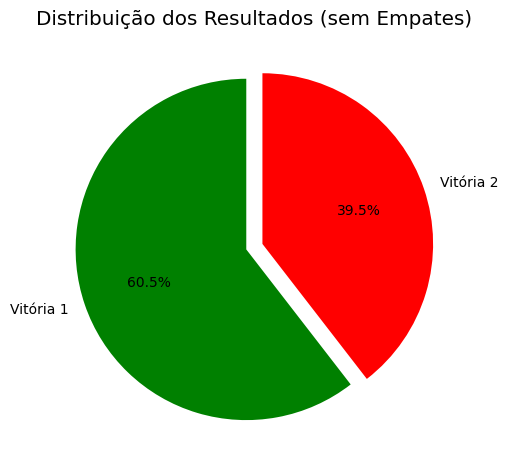

In [1028]:
# Função para classificar o resultado da partida

df_randomForest = df_randomForest[df_randomForest['Gols 1'] != df_randomForest['Gols 2']].reset_index(drop=True)

df_randomForest['Resultado'] = df_randomForest.apply(lambda row: 'Vitória 1' if row['Gols 1'] > row['Gols 2'] else 'Vitória 2', axis=1)

distribuicao_resultados = df_randomForest['Resultado'].value_counts(normalize=True)
cores = {
    'Vitória 1': 'green',
    'Vitória 2': 'red'
}

distribuicao_resultados.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05] * len(distribuicao_resultados),
    colors=[cores[resultado] for resultado in distribuicao_resultados.index]
)
plt.title('Distribuição dos Resultados (sem Empates)')
plt.ylabel('')
plt.tight_layout()
plt.show()

Foi utilizado o modelo de Random Forest baseado em diferenças estatísticas entre dois times (as chamadas features diferenciais) para prever o resultado de partidas de futebol, incluindo vitórias e empates.Foi escolhidas as features que tiveravem a maior porcentagem de correlação com o resultado.

O modelo não utiliza diretamente os valores absolutos das estatísticas dos times, como “Chutes a gol 1”. Em vez disso, calcula-se a diferença entre os dois lados, como “Chutes a gol 1 - Chutes a gol 2”.Já que é uma abordagem que reduz a necessidade de normalização ou padronização e melhora a capacidade de generalização para jogos entre equipes diferentes.

Os outliers, que em outros modelos como regressões podem causar distorções significativas, têm pouco efeito no Random Forest. Isso ocorre porque árvores de decisão segmentam os dados e isolam casos extremos em galhos próprios e o impacto de um outlier em uma única árvore é diluído quando centenas de árvores são combinadas. No futebol, valores que podem parecer extremos, mas muitas vezes são momentos decisivos da partida. Remover esses dados seria não usar informações cruciais.

Da mesma forma é comum acreditar que valores nulos precisam sempre ser tratados. No entanto, ao fazer isso, corre-se o risco de inserir padrões artificiais nos dados. O Random Forest é tolerante a dados faltantes quando eles não são predominantes. Ao manter os nulos, o modelo consegue aprender padrões mais reais e específicos do domínio.
As vitórias 2 são naturalmente mais difíceis de prever, pois são menos frequentes e apresentam padrões estatísticos menos claros. Ao aplicar pesos maiores para essa classe usando class_weight, o modelo consegue aprender mais sobre esse tipo de resultado e corrigir o desequilíbrio entre as classes.


Assim este modelo tenta respeita a natureza dos dados esportivos: imprevisíveis, desbalanceados e repletos de exceções. Ao não tratar valores nulos ou outliers e ao usar variáveis diferenciais entre os times, o Random Forest aproveita melhor as informações disponíveis e foca no que realmente importa: padrões consistentes e reais de desempenho.

Embora pareça contraintuitiva, essa abordagem entrega melhor desempenho preditivo justamente porque não tenta fazer uma “limpeza” que pode apagar informações imporatantes. O modelo aprende com os dados como eles são no futebol.

No gráfico de performace o modelo apresentou desempenho sólido nas classes mais representadas, especialmente na categoria Vitória 1.Em relação à precisão (precision), Vitória 1 obteve o melhor resultado com 0.83. A classe Vitória 2 teve a menor precisão, com 0.77, indicando maior número de previsões que estavam incorretas.

No aspecto de revocação (recall), o modelo também teve melhor desempenho em Vitória 1, com 0.85, demonstrando boa capacidade de identificar corretamente os casos dessa classe. Vitória 2 teve um recall de 0.75, revelando que o modelo deixa passar vitórias 2 reais.

Ao observar o f1-score, que equilibra precisão e recall, Vitória 1 manteve o destaque com 0.84, seguida por Vitória 2 (0.76), mostrando a maior dificuldade do modelo justamente na classe mais equilibrada.

Assim da para perceber que mesmo com a tentativa de balanceamento o modelo ainda favorece vitória 1 e tem mais dificuldade de prever vitória 2.

Acurácia: 0.8061471442400775
              precision    recall  f1-score   support

   Vitória 1       0.83      0.85      0.84      2477
   Vitória 2       0.77      0.74      0.75      1655

    accuracy                           0.81      4132
   macro avg       0.80      0.80      0.80      4132
weighted avg       0.81      0.81      0.81      4132



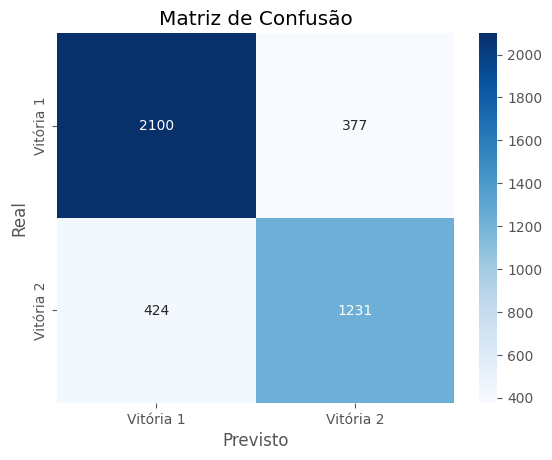

In [1029]:
df_randomForest = df_randomForest[df_randomForest['Gols 1'] != df_randomForest['Gols 2']].copy()
df_randomForest['Resultado'] = df_randomForest.apply(
    lambda row: 'Vitória 1' if row['Gols 1'] > row['Gols 2'] else 'Vitória 2',
    axis=1)

colunas_para_remover = [
    "Time 1", "Time 2", 
    "Position 1", "Position 2",
    "Gols 1", "Gols 2",
    'Tratamentos 2', 'Tratamentos 1',
    'Substituições 2', 'Substituições 1',
    'Tiros-livres 2', 'Tiros-livres 1',
    'Tiro de meta 1', 'Tiro de meta 2', 
    'Laterais 1', 'Laterais 2', 
    'Impedimentos 1', 'Impedimentos 2', 
    'Faltas 1', 'Faltas 2',
    'Escanteios 1', 'Escanteios 2', 
    'Chutes fora 2', 'Chutes fora 1', 
    "Cartões vermelhos 1", "Cartões vermelhos 2"
]

df_randomForest = df_randomForest.drop(columns=[col for col in colunas_para_remover if col in df_randomForest.columns])


for col1 in [col for col in df_randomForest.columns if col.endswith(" 1")]:
    base = col1[:-2]
    col2 = base + " 2"
    if col2 in df_randomForest.columns:
        df_randomForest[base + "_diff"] = df_randomForest[col1] - df_randomForest[col2]

# Define features e target
features = [col for col in df_randomForest.columns if col.endswith("_diff")]
X = df_randomForest[features]
y = df_randomForest["Resultado"]

# Treina o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pesos_personalizados = {
    'Vitória 1': 1.0,
    'Vitória 2': 1.4,
}
modelo = RandomForestClassifier(random_state=42, class_weight=pesos_personalizados)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()
